In [1]:
import datetime
import csv
import pickle
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os #システム操作系
from pathlib import Path #ファイル操作系
from createdatas3 import intensity, gaussian_beam
from scipy.optimize import curve_fit    # フィッティング用
from scipy.stats import norm

In [2]:
# このファイルの存在するフォルダの絶対パスを取得
dir_name = str(Path().resolve())
print('このファイルの存在するフォルダ：', dir_name)

# 保存先フォルダのパス作成
save_folder = os.path.join(dir_name, '210115')
print('保存フォルダ：', save_folder)

# 保存先フォルダの作成(既に存在する場合は無視される)
os.makedirs(save_folder, exist_ok=True)

このファイルの存在するフォルダ： /Users/nagaiyuma/Documents/myprogram
保存フォルダ： /Users/nagaiyuma/Documents/myprogram/210115


In [3]:
# グラフの初期設定
plt.rcParams["figure.figsize"] = [3.14, 3.14] # 図の縦横のサイズ([横(inch),縦(inch)])
plt.rcParams["figure.dpi"] = 200 # dpi(dots per inch)
plt.rcParams["figure.facecolor"] = 'white' # 図の背景色
plt.rcParams["figure.edgecolor"] = 'black' # 枠線の色
plt.rcParams["font.family"] = "serif"       # 使用するフォント
plt.rcParams["font.serif"] = "Times New Roman"
plt.rcParams["font.size"] = 14              # 基本となるフォントの大きさ

plt.rcParams["xtick.direction"] = "in"      # 目盛り線の向き、内側"in"か外側"out"かその両方"inout"か
plt.rcParams["ytick.direction"] = "in"      # 目盛り線の向き、内側"in"か外側"out"かその両方"inout"か
plt.rcParams["xtick.bottom"] = True         # 下部に目盛り線を描くかどうか
plt.rcParams["ytick.left"] = True           # 左部に目盛り線を描くかどうか
plt.rcParams["xtick.major.size"] = 2.0      # x軸主目盛り線の長さ
plt.rcParams["ytick.major.size"] = 2.0      # y軸主目盛り線の長さ
plt.rcParams["xtick.major.width"] = 0.3     # x軸主目盛り線の線幅
plt.rcParams["ytick.major.width"] = 0.3     # y軸主目盛り線の線幅
plt.rcParams["xtick.minor.visible"] = False # x軸副目盛り線を描くかどうか
plt.rcParams["ytick.minor.visible"] = False # y軸副目盛り線を描くかどうか
plt.rcParams["xtick.minor.size"] = 2.0      # x軸副目盛り線の長さ
plt.rcParams["ytick.minor.size"] = 2.0      # y軸副目盛り線の長さ
plt.rcParams["xtick.minor.width"] = 0.3     # x軸副目盛り線の線幅
plt.rcParams["ytick.minor.width"] = 0.3     # y軸副目盛り線の線幅
plt.rcParams["xtick.labelsize"] = 8        # 目盛りのフォントサイズ
plt.rcParams["ytick.labelsize"] = 8        # 目盛りのフォントサイズ
plt.rcParams["xtick.major.pad"] = 3.0      # x軸から目盛までの距離
plt.rcParams["ytick.major.pad"] = 4.0      # y軸から目盛までの距離

plt.rcParams["axes.labelsize"] = 10         # 軸ラベルのフォントサイズ
plt.rcParams["axes.linewidth"] = 0.4        # グラフ囲う線の太さ
plt.rcParams["axes.grid"] = False           # グリッドを表示するかどうか

In [ ]:
#実験データ読み込み
NUMBER = 1
data_num    = 50
data_size_x = 1360
data_size_y = 1024
experiments = np.zeros((data_num, data_size_x, data_size_y))

for i in range(data_num):
    data_path = f'/Users/nagaiyuma/Desktop/maindata/201204/n=1/{NUMBER}.csv'
    print(data_path)
    with open(data_path) as f:
        reader = csv.reader(f, quoting=csv.QUOTE_NONNUMERIC)
        experiments[i] = np.array([row for row in reader])
    NUMBER = NUMBER +1

In [ ]:
#実験データ読み込み
NUMBER = 1
data_num    = 50
data_size_x = 1360
data_size_y = 1024
experiments = np.zeros((data_num, data_size_x, data_size_y))

for i in range(data_num):
    data_path = f'/Users/nagaiyuma/Desktop/maindata/201209/正規化なし,f=49/{NUMBER}.csv'
    print(data_path)
    with open(data_path) as f:
        reader = csv.reader(f, quoting=csv.QUOTE_NONNUMERIC)
        experiments[i] = np.array([row for row in reader])
    NUMBER = NUMBER +1

In [ ]:
#散乱光なしのデータ読み込み
NUMBER = 1
data_num    = 50
data_size_x = 1360
data_size_y = 1024
ini_noise = np.zeros((data_num, data_size_x, data_size_y))

for i in range(data_num):
    data_path = f'/Users/nagaiyuma/Desktop/maindata/201204/レーザーなし,f=49/{NUMBER}.csv'
    print(data_path)
    with open(data_path) as f:
        reader = csv.reader(f, quoting=csv.QUOTE_NONNUMERIC)
        ini_noise[i] = np.array([row for row in reader])
    NUMBER = NUMBER +1

In [ ]:
#実験データ書き込み
dt_now = datetime.datetime.now()
print('現在時刻：', dt_now)
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +f'_experiments.pkl'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
with open(save_file, mode='wb') as f:
    pickle.dump(experiments, f)
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)
experiments_file = save_file

In [ ]:
#データ書き込み
dt_now = datetime.datetime.now()
print('現在時刻：', dt_now)
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +f'_ini_noise.pkl'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
with open(save_file, mode='wb') as f:
    pickle.dump(ini_noise, f)
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

In [31]:
experiments_file = '2020-12-12_16-21_experiments.pkl'
#実験データ読み込み
with open(experiments_file, mode="rb") as f:
    experiments = pickle.load(f)
print(experiments.shape)

(50, 1360, 1024)


In [37]:
#平均と標準偏差の計算
ave_exp = np.average(experiments, axis=0)
std_exp = np.std(experiments, axis=0)

In [33]:
#中心位置推定
idx = np.unravel_index(np.argmax(experiments[0]), experiments[0].shape)

print(ave_exp[idx[0],idx[1]])

3843.04


In [34]:
#正規化
experiments = experiments / experiments.max()

In [45]:
#表示データ抽出
size = 100
ave = ave_exp[idx[0]-size:idx[0]+size+1, idx[1]-size:idx[1]+size+1]
std = std_exp[idx[0]-size:idx[0]+size+1, idx[1]-size:idx[1]+size+1]
x_array = np.arange(idx[0]-size, idx[0]+size, 1.0)                         # x配列
y_array = np.arange(idx[1]-size, idx[1]+size, 1.0)                         # y配列
x_grid, y_grid = np.meshgrid(x_array, y_array)
#長さ取得
nx = len(x_array)
ny = len(y_array)

In [73]:
#プロファイル取得
profiles = experiments_h[:,:,idx[1]]
print(profiles.shape)
#サイズ抽出
size = 100
pro =profiles[:,idx[0]-size:idx[0]+size]
print(pro.shape)
print(pro.max())

(50, 1360)
(50, 200)
0.9294666088979162


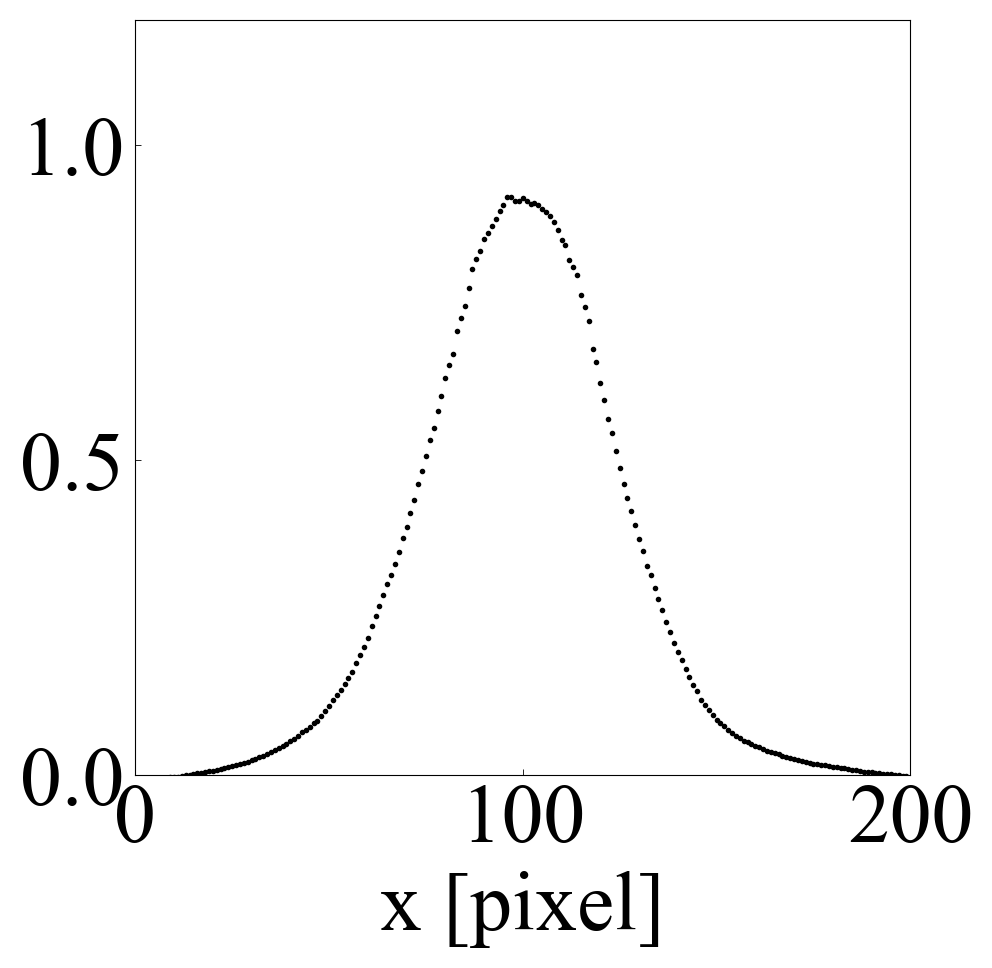

In [74]:
ave_pro = np.average(pro, axis=0)
std_pro = np.std(pro, axis=0)
dt_now = datetime.datetime.now()
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +f'exp-prof.pdf'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
#表示
x_array = np.arange(0, 200, 1.0)   
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.set_xlabel("x [pixel]", fontsize=30)
#ax.set_ylabel("    [a.u.]", fontsize=30)
plt.scatter(x_array, ave_pro,  color="black", label = 'x0 = 0.0', s=1.0)
ax.set_xlim(0.0,200.0)
ax.set_ylim(0.0,1.2)
plt.tick_params(labelsize=30)
ax.grid(False)
#fig.savefig(save_name, format="pdf", bbox_inches="tight")
plt.show()

In [13]:
#1Dガウシアンビームの関数の定義
def gaussian_beam(x,i0,x0,w0,h0):
    return  i0 * np.exp(-2*(x-x0)**2/w0**2) + h0
i0 = 1.0
x0 = 100.0
w0 = 50.0
h0 = 0.0
x_array = np.arange(0, 200, 1.0)   
param_ini_x = np.array([i0, x0, w0, h0])  # フィッティングの初期値 (ここではデータから推定は行わない)
param, cov  = curve_fit(gaussian_beam, x_array, ave_pro, p0=param_ini_x, maxfev=2000)
print(param)

#パラメータ保存
dt_now = datetime.datetime.now()
print('現在時刻：', dt_now)
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +f'_fit-param.pkl'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
with open(save_file, mode='wb') as f:
    pickle.dump(param, f)
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)
experiments_file = save_file

[9.15404009e-01 9.97140286e+01 4.55644726e+01 7.97132619e-02]
現在時刻： 2021-01-15 21:00:06.391019
保存ファイル名： 2021-01-15_21-00_fit-param.pkl
保存ファイルパス： /Users/nagaiyuma/Documents/myprogram/210115/2021-01-15_21-00_fit-param.pkl


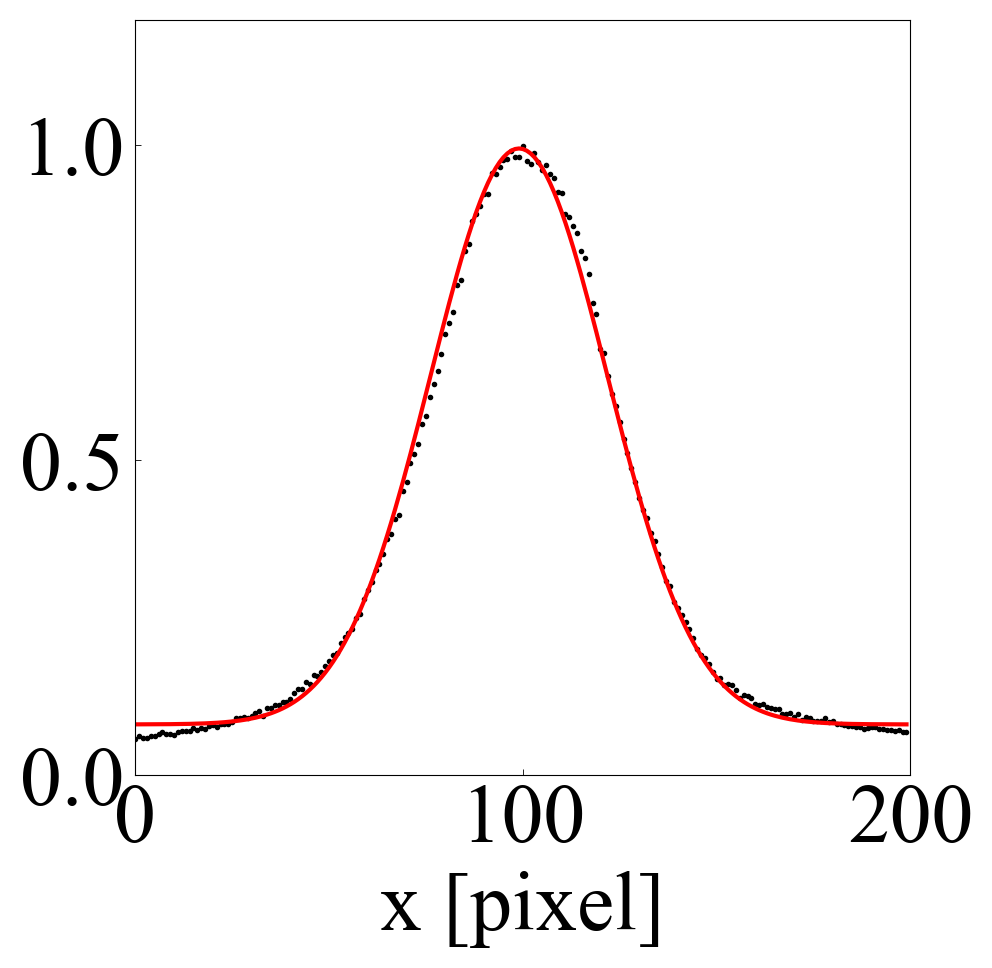

2021-01-15_21-00_prof-exp.pdf
/Users/nagaiyuma/Documents/myprogram/210115/2021-01-15_21-00_prof-exp.pdf


In [15]:
parameters = np.zeros(4)
parameters[0] = param[0]
parameters[1] = 99
parameters[2] = param[2]
parameters[3] = param[3]
fit = gaussian_beam(x_array, *parameters)

#表示
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +f'_prof-exp.pdf'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.set_xlabel("x [pixel]", fontsize=30)
#ax.set_ylabel("    [a.u.]", fontsize=30)
#ax.plot(x_array, fit, color="red")
ax.scatter(x_array, pro[0],  color="black", label = 'x0 = 0.0',s=1.0)
ax.set_xlim(0.0,200.0)
ax.set_ylim(0,1.2)
plt.tick_params(labelsize=30)
ax.grid(False)
#fig.savefig(save_file, format="pdf", bbox_inches="tight")
plt.show()
print(save_name)
print(save_file)

In [24]:
#表示データ抽出
size = 100
exp = experiments[:,idx[0]-size:idx[0]+size, idx[1]-size:idx[1]+size]
x_array = np.arange(0, size*2, 1.0)                         # x配列
y_array = np.arange(0, size*2, 1.0)
idx2 = np.unravel_index(np.argmax(ave), ave.shape)
x_grid, y_grid = np.meshgrid(x_array, y_array)
#長さ取得
nx = len(x_array)
ny = len(y_array)
#2D楕円ガウシアンビームの関数の定義
def gaussian_beam_xy(X,i0,b0,x0,y0,wx,wy,h0):
    x,y = X
    return  (i0*np.exp((-2/(1-b0**2))*(((x-x0)/wx)**2+((y-y0)/wy)**2-2*b0*((x-x0)/wx)*((y-y0)/wy)))+ h0).flatten()

#初期パラメータ
i0 = 4000.0
b0 = 0.5
x0 = idx2[0]
y0 = idx2[1]
wx = 50.0
wy = 50.0
h0 = 0.0
param_ini = np.array([i0, b0, x0, y0, wx, wy, h0])
parameters = np.zeros((50, len(param_ini)))

for i in range(50):    
    exp_i = exp[i].flatten()
    param, cov  = curve_fit(gaussian_beam_xy, (x_grid.T, y_grid.T), exp_i, p0=param_ini, maxfev=2000)
    parameters[i] = param
#結果の表示
ave_param = np.average(parameters, axis=0)
std_param = np.std(parameters, axis=0)

print(f'i0 = {ave_param[0]}±{std_param[0]}')
print(f'b0 = {ave_param[1]}±{std_param[1]}')
print(f'x0 = {ave_param[2]}±{std_param[2]}')
print(f'y0 = {ave_param[3]}±{std_param[3]}')
print(f'wx = {ave_param[4]}±{std_param[4]}')
print(f'wy = {ave_param[5]}±{std_param[5]}')
print(f'h0 = {ave_param[6]}±{std_param[6]}')

i0 = 0.9102943688753681±0.00024828974601306367
b0 = 0.0010577900035619694±0.00022775093253037
x0 = 99.37538270829451±0.01610876748080185
y0 = 100.76819874679886±0.015781025818224416
wx = 46.93587224185844±0.01006172155468701
wy = 51.258779359220995±0.010766737327682569
h0 = 0.0705492543480855±4.826064176097785e-05


In [9]:
px_um = 6.45 #px/um
ave_um = ave_param / px_um
std_um = std_param / px_um
print(f'x0 = {ave_um[2]}±{std_um[2]} um')

x0 = 15.562051070246108±0.002497383031110884 um


In [47]:
#フィッティングパラメータ取得
data_param_path = '2020-12-12_16-27_fit-param.pkl'
with open(data_param_path, mode="rb") as f:
    param = pickle.load(f)

print(param)

[9.10275707e-01 1.06189159e-03 5.53375228e+02 3.51767424e+02
 4.69499087e+01 5.12736556e+01 7.04242481e-02]


In [25]:
#オフセット処理
experiments_h = np.zeros((experiments.shape))
experiments_h = experiments - param[6]
#平均と標準偏差の計算
ave_exp_h = np.average(experiments_h, axis=0)
std_exp_h = np.std(experiments_h, axis=0)

In [14]:
#正規化
experiments_h = experiments_h / experiments_h.max()

ave_exp_h = np.average(experiments_h, axis=0)
std_exp_h = np.std(experiments_h, axis=0)

In [51]:
#表示データ抽出
size = 100
ave = ave_exp_h[idx[0]-size:idx[0]+size, idx[1]-size:idx[1]+size+1]
std = std_exp_h[idx[0]-size:idx[0]+size, idx[1]-size:idx[1]+size+1]
x_array = np.arange(idx[0]-size, idx[0]+size, 1.0)                         # x配列
y_array = np.arange(idx[1]-size, idx[1]+size, 1.0)                         # y配列
x_grid, y_grid = np.meshgrid(x_array, y_array)
#長さ取得
nx = len(x_array)
ny = len(y_array)

In [14]:
print((experiments - param[6]).max())

3617.968375601988


現在時刻： 2021-01-15 21:53:50.524240


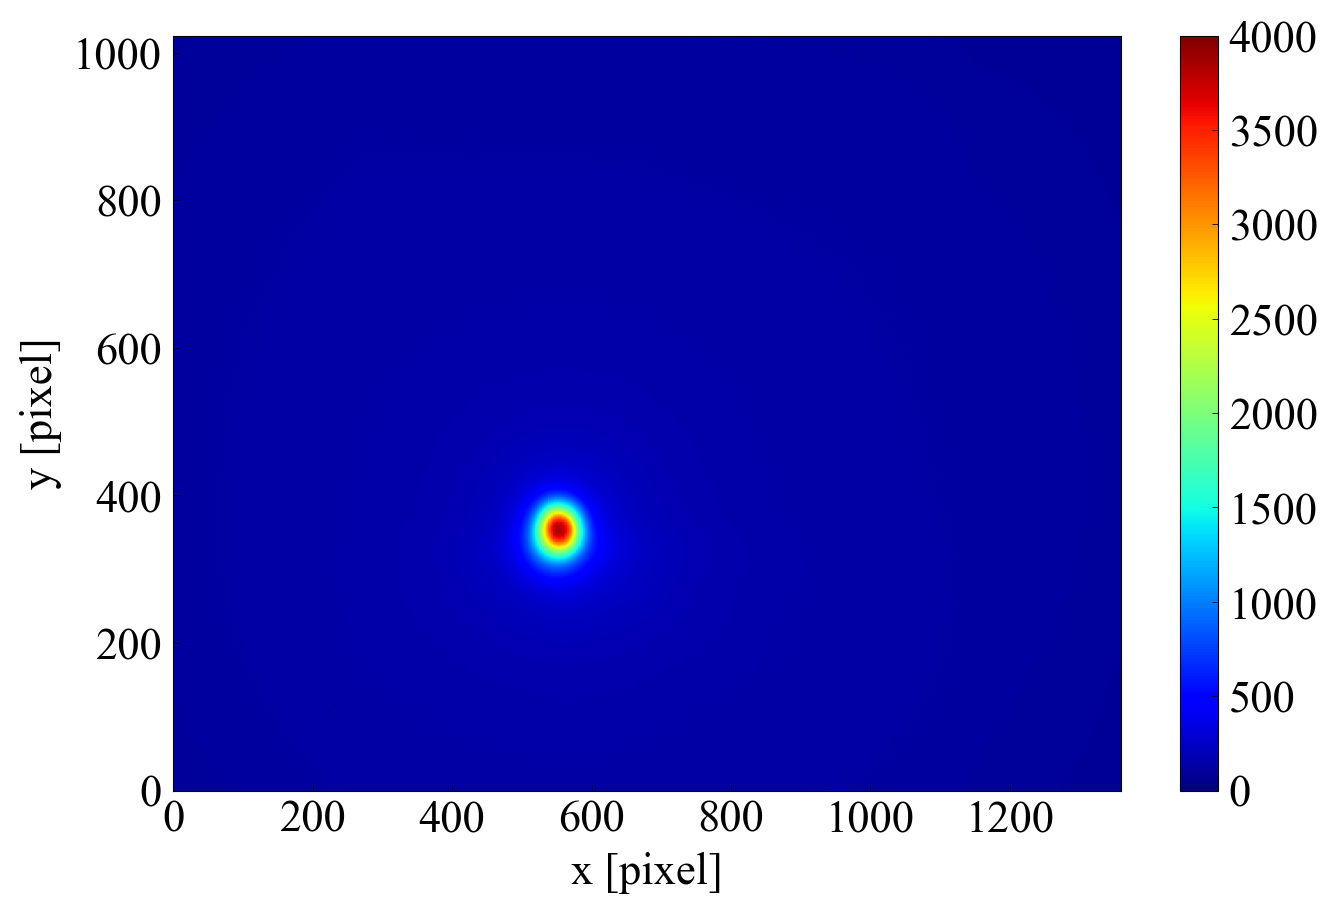

保存ファイル名： 2021-01-15_21-53_exp_jet.png
保存ファイルパス： /Users/nagaiyuma/Documents/myprogram/210115/2021-01-15_21-53_exp_jet.png


In [22]:
dt_now = datetime.datetime.now()
print('現在時刻：', dt_now)

xexp_array = range(experiments.shape[1])
yexp_array = range(experiments.shape[2])
xexp_grid, yexp_grid = np.meshgrid(xexp_array, yexp_array)
fig_size=1360/1024
#全面カラーマップ表示
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +'_exp_jet.pdf'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
fig = plt.figure(figsize=(5*fig_size+1,5))
ax = fig.add_subplot(111)
ax.set_xlabel("x [pixel]", fontsize=16)
ax.set_ylabel("y [pixel]", fontsize=16)
ax.tick_params(labelsize=16)
mappable = ax.pcolormesh(xexp_grid.T, yexp_grid.T, ave_exp, cmap='jet', vmin=0.0, vmax=4000.0)
cbar = fig.colorbar(mappable, ax=ax)
#cbar.set_label("Error", fontsize=16)
cbar.ax.tick_params(labelsize=16)
fig.savefig(save_file, format="pdf", bbox_inches="tight")
plt.show()
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

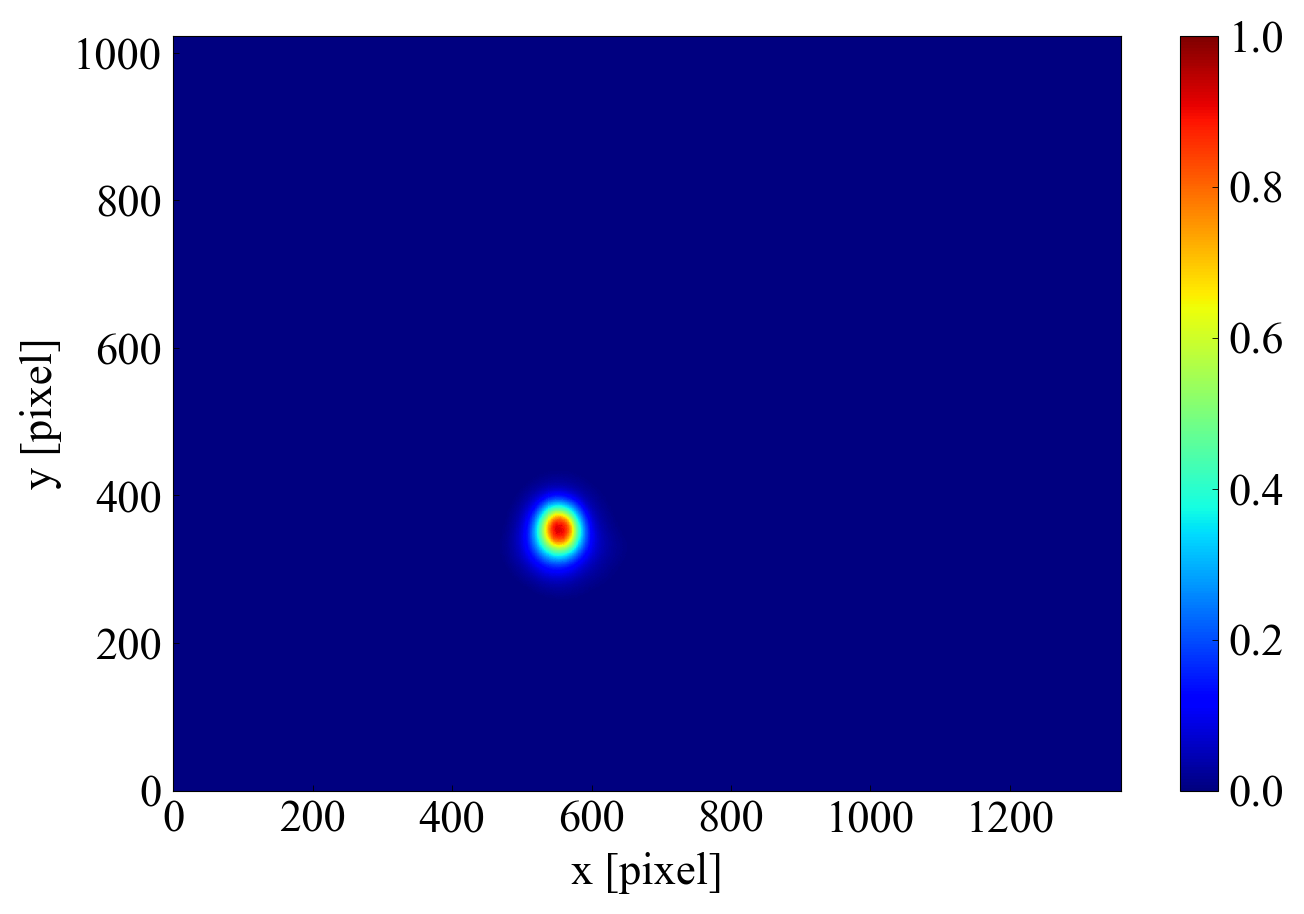

保存ファイル名： 2021-01-15_22-34_exp_jet.png
保存ファイルパス： /Users/nagaiyuma/Documents/myprogram/210115/2021-01-15_22-34_exp_jet.png


In [50]:
fig_size=1360/1024
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +'_exp_jet.png'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
fig = plt.figure(figsize=(5*fig_size+1,5))
ax = fig.add_subplot(111)
ax.set_xlabel("x [pixel]", fontsize=16)
ax.set_ylabel("y [pixel]", fontsize=16)
ax.tick_params(labelsize=16)
mappable = ax.pcolormesh(xexp_grid.T, yexp_grid.T, ave_exp_h, cmap='jet', vmin=0.0, vmax=1.0)
cbar = fig.colorbar(mappable, ax=ax)
#cbar.set_label("Error", fontsize=16)
cbar.ax.tick_params(labelsize=16)
#fig.savefig(save_file)
plt.show()
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

現在時刻： 2020-12-18 00:42:59.755609


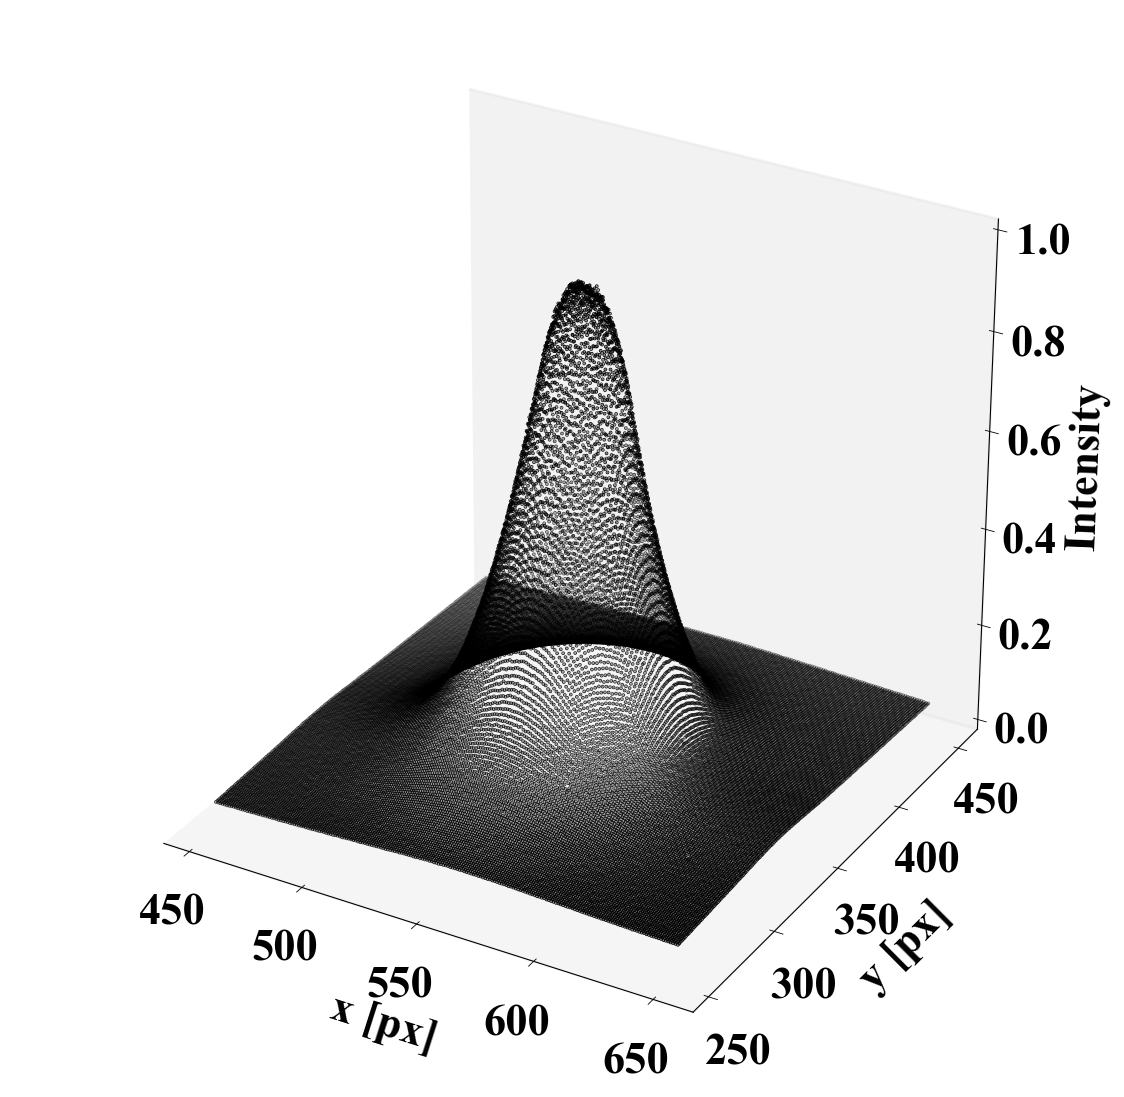

保存ファイル名： 2020-12-18_00-42_ave.png
保存ファイルパス： /Users/nagaiyuma/Documents/myprogram/201217/2020-12-18_00-42_ave.png


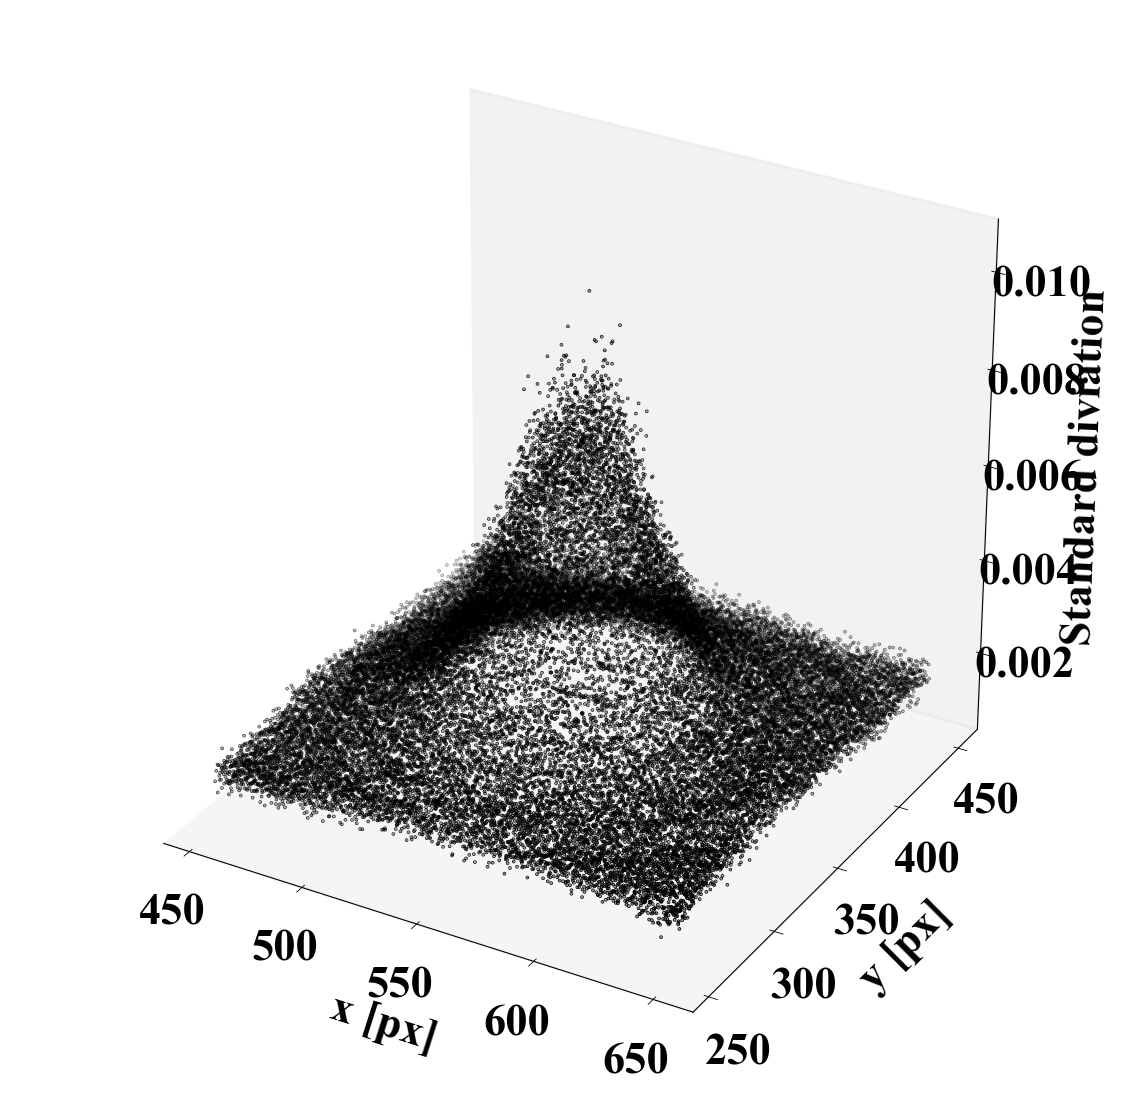

保存ファイル名： 2020-12-18_00-42_std.png
保存ファイルパス： /Users/nagaiyuma/Documents/myprogram/201217/2020-12-18_00-42_std.png


In [29]:
dt_now = datetime.datetime.now()
print('現在時刻：', dt_now)

#平均
#3次元グラフ表示
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +'_ave.png'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("x [px]", fontsize=16)
ax.set_ylabel("y [px]", fontsize=16)
ax.set_zlabel("Intensity", fontsize=16)
ax.set_zlim(0.0, 1.0)
plt.tick_params(labelsize=16)
ax.grid(False)
ax.scatter(x_grid.T, y_grid.T, ave, color='black', s=0.1)
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
fig.savefig(save_file, format="png", bbox_inches="tight")
plt.show()
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

#標準偏差
#３次元グラフの表示
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +'_std.png'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("x [px]", fontsize=16)
ax.set_ylabel("y [px]", fontsize=16)
ax.set_zlabel("Standard diviation", fontsize=16)
#ax.set_zlim(0.0, 0.015)
plt.tick_params(labelsize=16)
ax.grid(False)
ax.scatter(x_grid.T, y_grid.T, std, color='black', s=0.1)
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
#fig.savefig(save_file, format="png", bbox_inches="tight")
plt.show()
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

現在時刻： 2021-01-15 23:03:22.092290


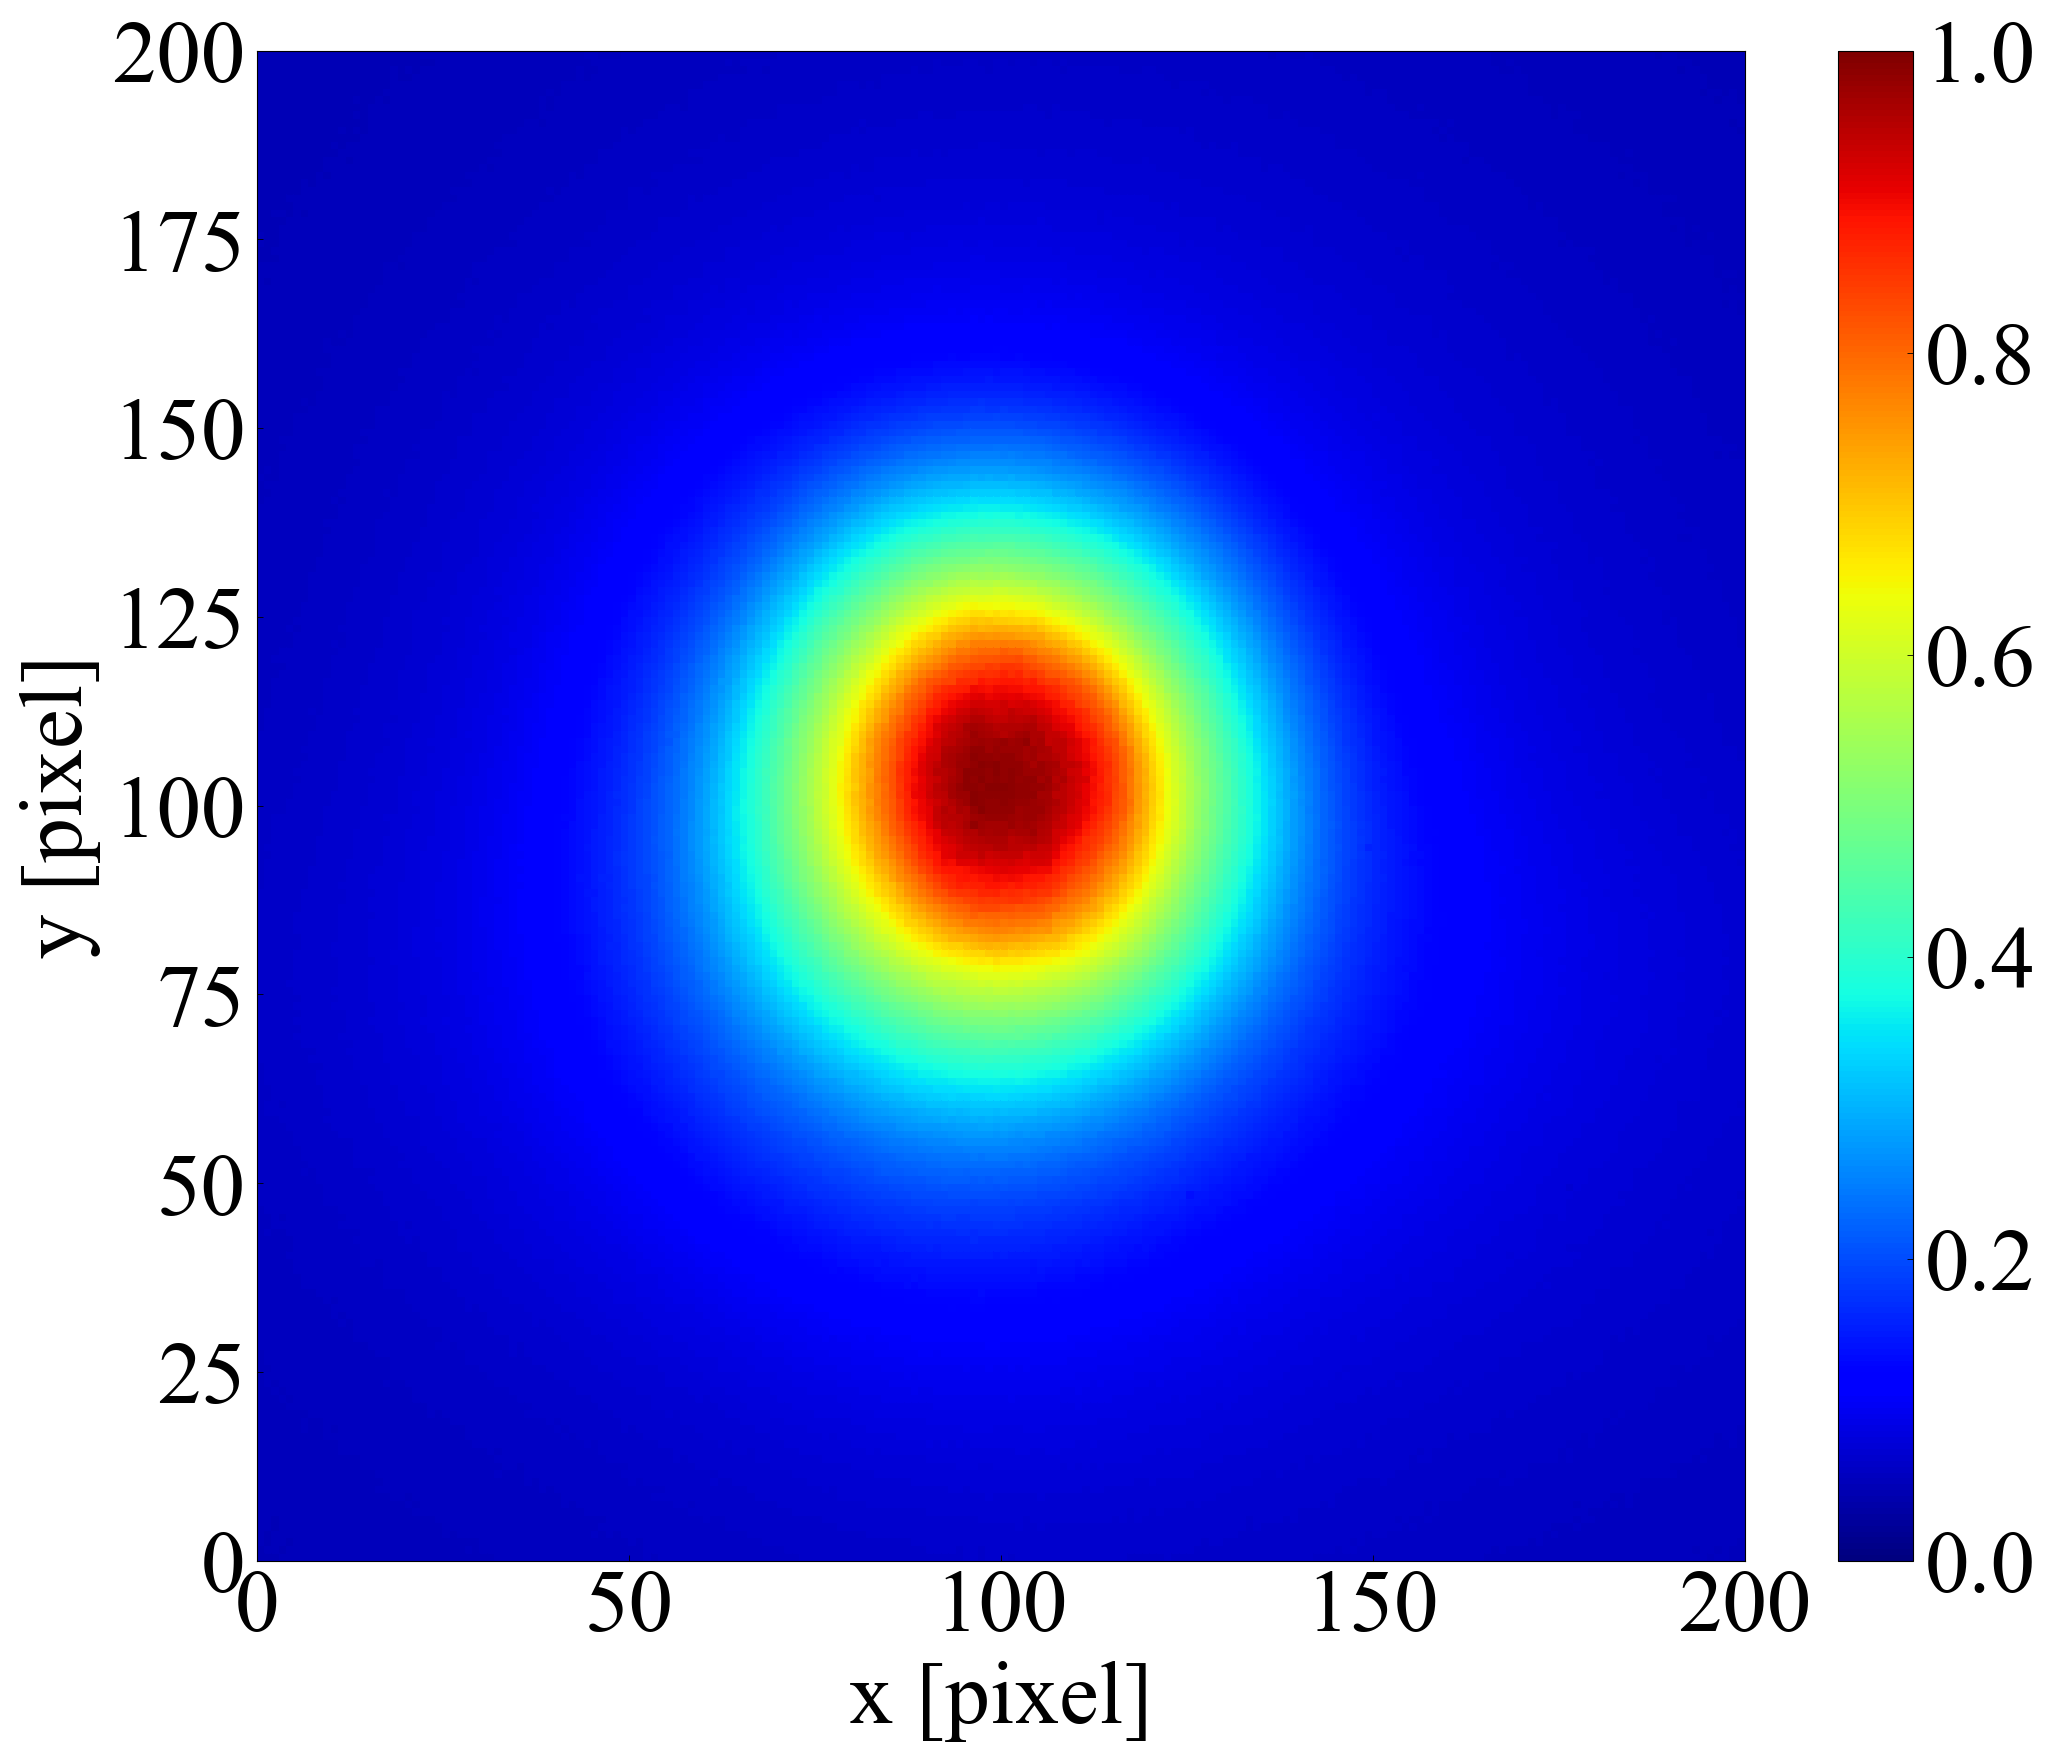

保存ファイル名： 2021-01-15_23-03_ave-cmap.png
保存ファイルパス： /Users/nagaiyuma/Documents/myprogram/210115/2021-01-15_23-03_ave-cmap.png


In [56]:
dt_now = datetime.datetime.now()
print('現在時刻：', dt_now)

x_array = np.arange(0, 2*size+1, 1.0)                         # x配列
y_array = np.arange(0, 2*size+1, 1.0)                         # y配列
x_grid, y_grid = np.meshgrid(x_array, y_array)
nx = len(x_array)
ny = len(y_array)
x_grid.reshape(nx,ny)
y_grid.reshape(nx,ny)
ave.reshape(nx,ny)
std.reshape(nx,ny)

#カラーマップ表示
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +'_ave-cmap.png'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
ax.set_xlabel("x [pixel]", fontsize=32)
ax.set_ylabel("y [pixel]", fontsize=32)
ax.tick_params(labelsize=32)
mappable = ax.pcolormesh(x_grid.T, y_grid.T, ave, cmap='jet', vmin=0.0, vmax=1.0)
cbar = fig.colorbar(mappable, ax=ax)
#cbar.set_label("Intensity", fontsize=16,rotation=270,labelpad = 15)
cbar.ax.tick_params(labelsize=32)
fig.savefig(save_file, format="png", bbox_inches="tight")
plt.show()
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

In [ ]:
#カラーマップ表示
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +'_std-cmap.png'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
ax.set_xlabel("x [px]", fontsize=16)
ax.set_ylabel("y [px]", fontsize=16)
ax.tick_params(labelsize=16)
mappable = ax.pcolormesh(x_grid.T, y_grid.T, std, cmap='jet', vmin=0.0, vmax=50)
cbar = fig.colorbar(mappable, ax=ax)
cbar.set_label("Standard division", fontsize=16,rotation=270, labelpad = 15)
cbar.ax.tick_params(labelsize=16)
#fig.savefig(save_file, format="png", bbox_inches="tight")
plt.show()
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

現在時刻： 2021-01-16 00:14:17.494250
y = √0.0010000x+0.00000
y = √0.0010000x
y = √0.0010000x


/Users/nagaiyuma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  
/Users/nagaiyuma/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:799: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/nagaiyuma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in sqrt


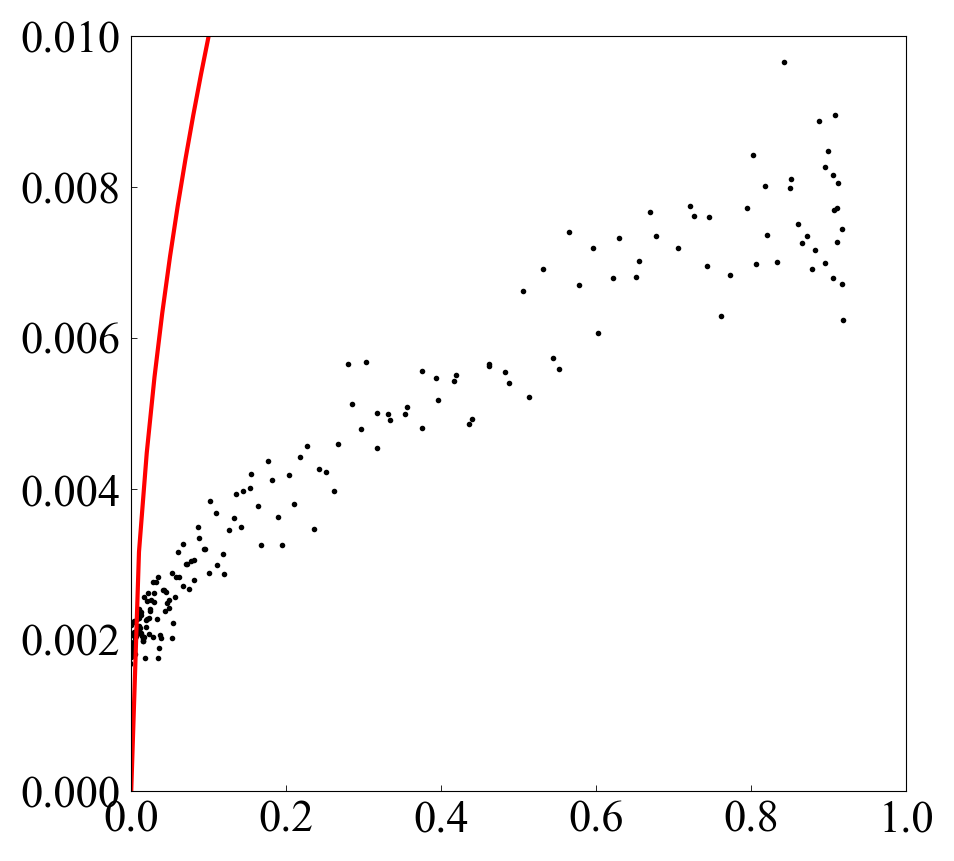

保存ファイル名： 2021-01-16_00-14_ave-std.png
保存ファイルパス： /Users/nagaiyuma/Documents/myprogram/210115/2021-01-16_00-14_ave-std.png


In [75]:
dt_now = datetime.datetime.now()
print('現在時刻：', dt_now)
ave = ave_pro
std = std_pro

#非線形Fの関数
def fit_func(x,p,q):
    return np.sqrt(x*p)+q

#非線形フィッティング
param_ini = np.array([0.001,0])
param, cov  = curve_fit(fit_func, ave.flatten(), std.flatten(), p0=param_ini, maxfev=2000)
fitting2 = fit_func(ave.flatten(), *param)
c1 = f'{param[0]:.7f}'
d1 = f'{param[1]:.5f}'
print(f'y = √{c1}x+{d1}')

#非線形Fの関数
def fit_func(x,p):
    return np.sqrt(x*p)

#非線形フィッティング
param_ini = np.array([0.001])
param, cov  = curve_fit(fit_func, ave.flatten(), std.flatten(), p0=param_ini, maxfev=2000)
fitting2 = fit_func(ave.flatten(), *param)
c1 = f'{param[0]:.7f}'
#d1 = f'{param[1]:.5f}'
print(f'y = √{c1}x')

#グラフ
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +'_ave-std.png'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
#ax.set_xlabel("Average of intensity", fontsize=16)
#ax.set_ylabel("Standard diviation of intensity", fontsize=16)
ax.set_xlim(0.0,1.0)
ax.set_ylim(0.0,0.01)
plt.tick_params(labelsize=16)
ax.grid(False)
ax.scatter(ave, std, color='black', s=1)
#非線形フィッティング
param_ini = np.array([0.001])
param, cov  = curve_fit(fit_func, ave.flatten(), std.flatten(), p0=param_ini, maxfev=2000)
x=np.arange(0.0,1.1,0.01)
fitting2 = fit_func(x, *param)
c1 = f'{param[0]:.7f}'
#d1 = f'{param[1]:.5f}'
print(f'y = √{c1}x')
ax.plot(x, fitting2, color='red', label=f'y = ({c1})^-1/2 ')
#plt.legend(frameon=False)
#ax.set_xlim(0.0, 1.0)
#fig.savefig(save_file, format="png", bbox_inches="tight")
plt.show()
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

現在時刻： 2020-12-17 15:12:16.967316
(50,)
0.9906526207605344
(0.006449126413155257, 0.007010705695503389)


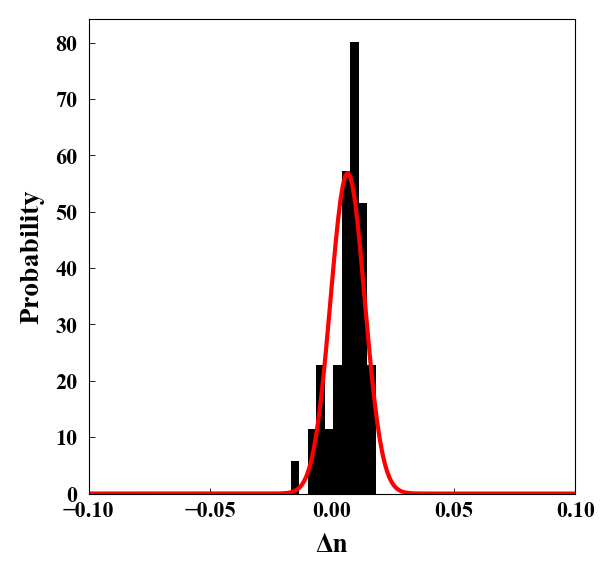

保存ファイル名： 2020-12-17_15-12_hist-max.png
保存ファイルパス： /Users/nagaiyuma/Documents/myprogram/201216/2020-12-17_15-12_hist-max.png


In [62]:
dt_now = datetime.datetime.now()
print('現在時刻：', dt_now)

#最大値の座標のヒストグラム
hist = experiments[:, idx[0],idx[1]+1]-ave_exp[idx[0]+1,idx[1]+2]
print(experiments[:, idx[0],idx[1]].shape)
print(ave_exp[idx[0],idx[1]])

#正規分布フィティング
param_ini = np.array([4, ave_exp[idx], std_exp[idx]])
x = np.linspace(-0.5,0.5, 1000)
param = norm.fit(hist)
print (param)
pdf_fitted = norm.pdf(x,loc=param[0], scale=param[1])
pdf = norm.pdf(x)

# ヒストグラムのグラフを作成
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +'_hist-max.png'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
plt.figure()
plt.plot(x, pdf_fitted, c='red')
plt.hist(hist, density=1, color='black')
plt.xlabel('Δn')
plt.ylabel('Probability')
plt.xlim(-0.1,0.1)
#plt.ylim(0.0, 15.0)
plt.savefig(save_file)
plt.show()
plt.close()
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

現在時刻： 2020-12-14 20:25:07.203424
(4.841960166146464e-20, 0.003025415428491627)


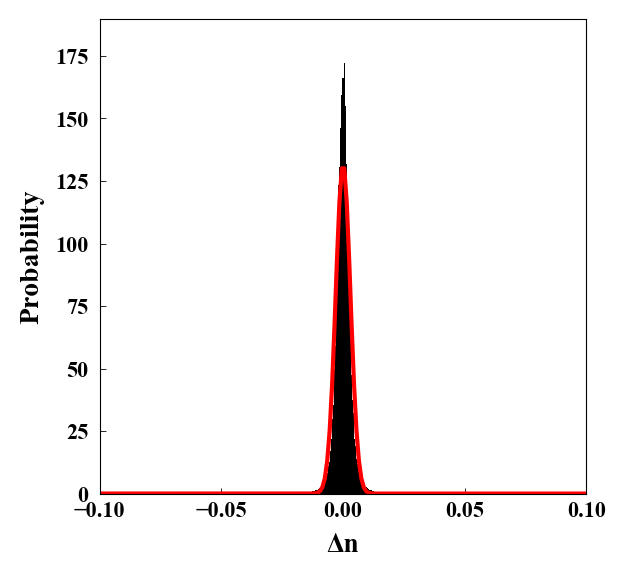

保存ファイル名： 2020-12-14_20-25_hist.png
保存ファイルパス： /Users/nagaiyuma/Documents/myprogram/201214/2020-12-14_20-25_hist.png


In [11]:
dt_now = datetime.datetime.now()
print('現在時刻：', dt_now)
hist = np.zeros((50,nx,ny))
#最大値の座標のヒストグラム
for i in range(50):
    hist[i] = exp[i] - ave
hist = hist.flatten()
#正規分布フィティング
param_ini = np.array([4, ave_exp[idx], std_exp[idx]])
x = np.linspace(-0.5,0.5, 1000)
param = norm.fit(hist)
print (param)
pdf_fitted = norm.pdf(x,loc=param[0], scale=param[1])
pdf = norm.pdf(x)

# ヒストグラムのグラフを作成
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +'_hist.png'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
plt.figure()
plt.plot(x, pdf_fitted, c='red')
plt.hist(hist, density=1, color='black', bins = 1000)
plt.xlabel('Δn')
plt.ylabel('Probability')
plt.xlim(-0.1,0.1)
#plt.ylim(0.0, 15.0)
plt.savefig(save_file)
plt.show()
plt.close()
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

現在時刻： 2020-12-15 19:23:05.434443


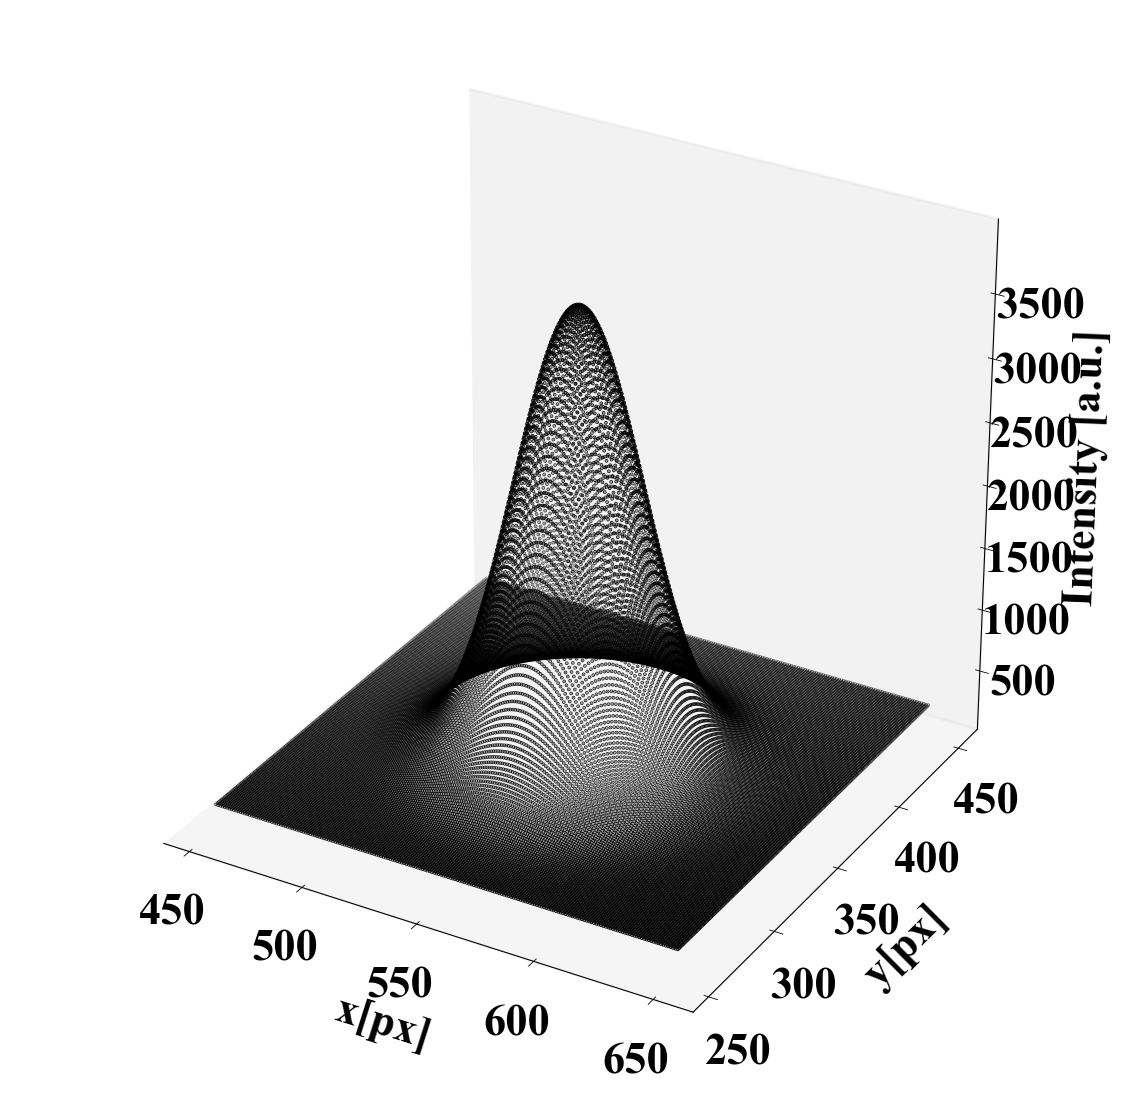

保存ファイル名： 2020-12-15_19-23_fit_g.png
保存ファイルパス： /Users/nagaiyuma/Documents/myprogram/201214/2020-12-15_19-23_fit_g.png


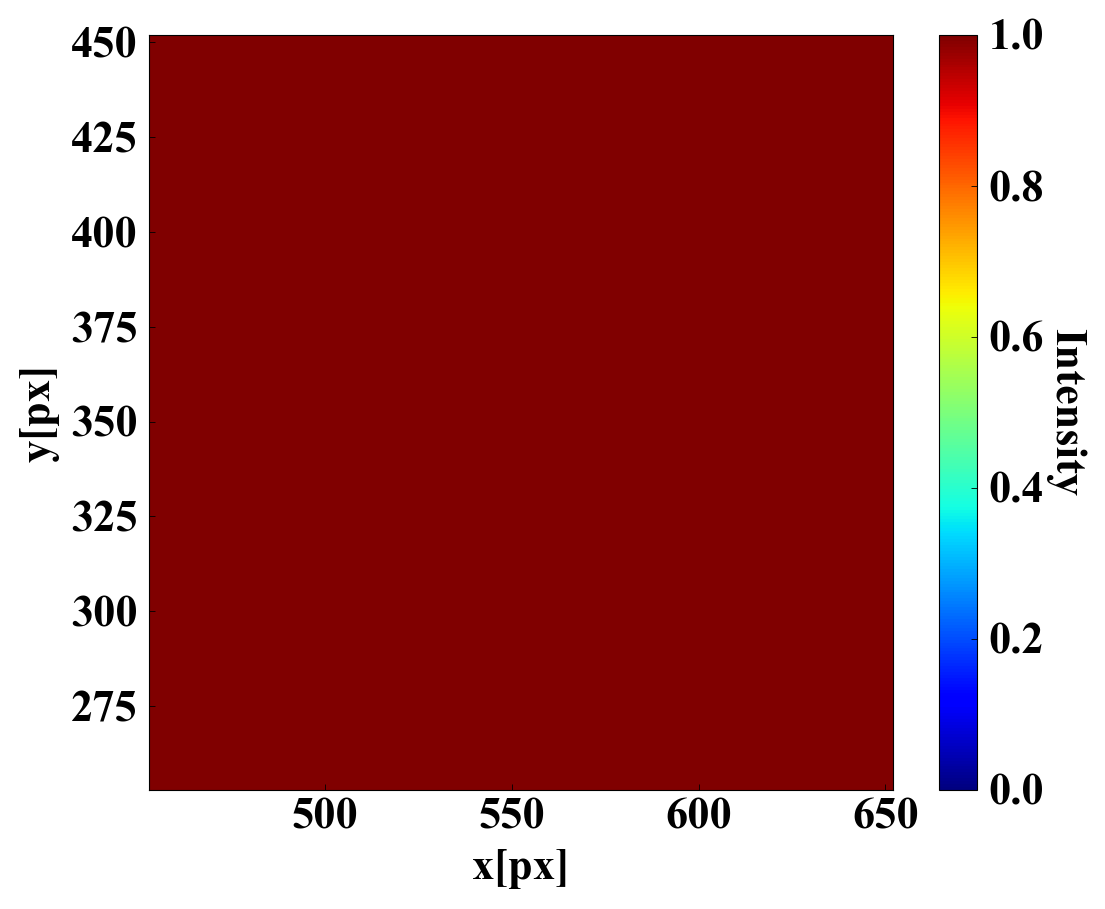

保存ファイル名： 2020-12-15_19-23_fit_g-jet.png
保存ファイルパス： /Users/nagaiyuma/Documents/myprogram/201214/2020-12-15_19-23_fit_g-jet.png


In [14]:
#2Dガウスフィッティング
#2Dガウシアンビームの関数の定義
def gaussian_beam_2d(X,a,b,c,d,e):
    x,y = X
    return  (a * np.exp(-2*((x-b)**2+(y-c)**2)/d**2) + e).flatten()
#初期パラメータ
i0 = 1.0
x0 = idx[0]
y0 = idx[1]
w0 = 50.0
h0 = 0.0
ave = ave.flatten()
param_ini = np.array([i0, x0, y0, w0, h0])  # フィッティングの初期値 (ここではデータから推定は行わない)
param, cov  = curve_fit(gaussian_beam_2d, (x_grid.T, y_grid.T), ave, p0=param_ini, maxfev=2000)
intensity_fit = gaussian_beam_2d((x_grid.T, y_grid.T), *param)
#結果の表示
dt_now = datetime.datetime.now()
print('現在時刻：', dt_now)
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +'_fit_g.png'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("x[px]", fontsize=16)
ax.set_ylabel("y[px]", fontsize=16)
ax.set_zlabel("Intensity [a.u.]", fontsize=16)
plt.tick_params(labelsize=16)
ax.grid(False)
ax.scatter(x_grid.T, y_grid.T, intensity_fit, color='black', s=0.1)
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
#fig.savefig(save_file, format="png", bbox_inches="tight")
plt.show()
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)
#カラーマップ表示
intensity_fit = intensity_fit.reshape(nx, ny)
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +'_fit_g-jet.png'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
ax.set_xlabel("x[px]", fontsize=16)
ax.set_ylabel("y[px]", fontsize=16)
ax.tick_params(labelsize=16)
mappable = ax.pcolormesh(x_grid.T, y_grid.T, intensity_fit, cmap='jet', vmin=0.0, vmax=1.0)
cbar = fig.colorbar(mappable, ax=ax)
cbar.set_label("Intensity", fontsize=16,rotation=270,labelpad = 15)
cbar.ax.tick_params(labelsize=16)
#fig.savefig(save_file, format="png", bbox_inches="tight")
plt.show()
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

In [18]:
experiments = experiments - param[4]

中心位置: (590, 464)
ガウスparam: [9.27958216e-01 5.97720515e+02 4.60026279e+02 5.69831402e+01
 5.23255846e-02]
残差:6.923866635588638e-12±0.022753423408447326


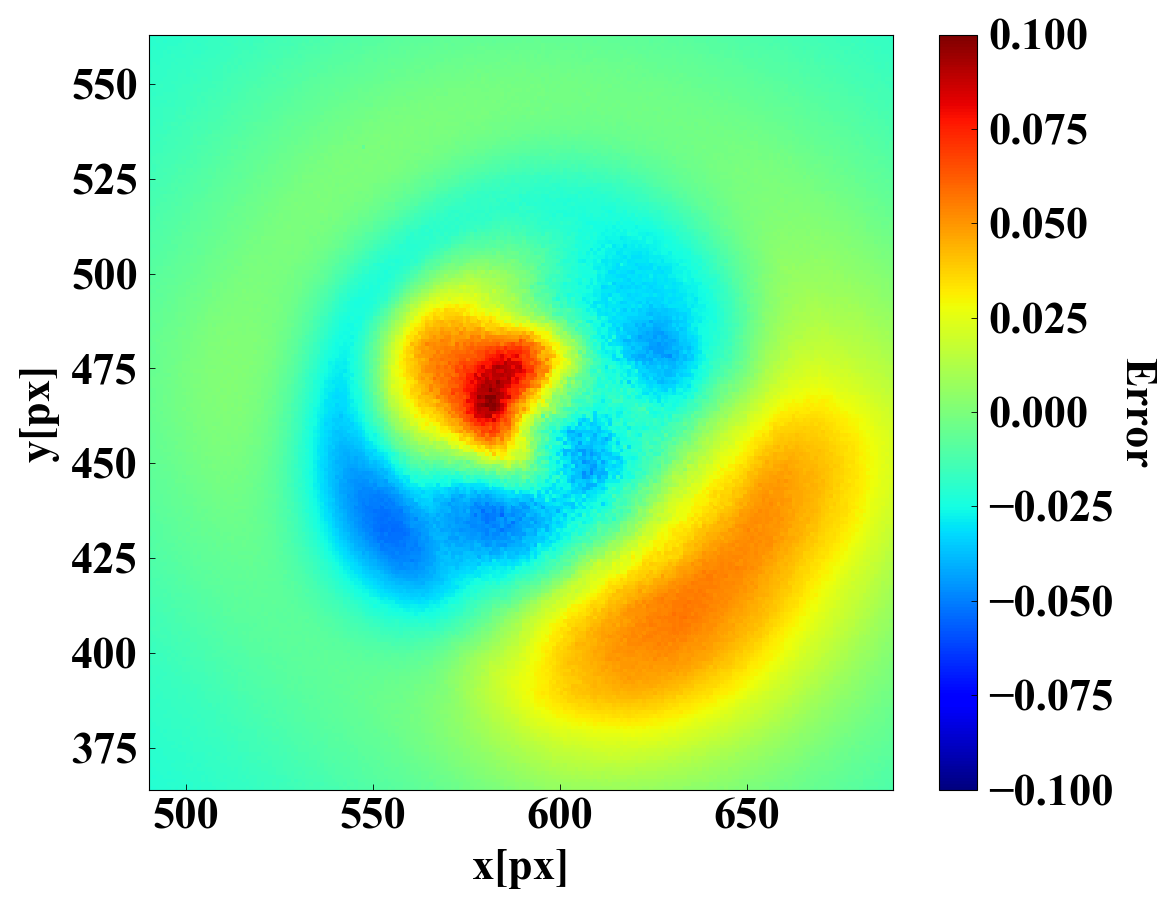

保存ファイル名： 2020-12-11_20-26error_cmap.png
保存ファイルパス： /Users/nagaiyuma/Documents/myprogram/201211/2020-12-11_20-26error_cmap.png


In [23]:
print(f'中心位置: {idx}')
print(f'ガウスparam: {param}')
error = (ave.flatten() - intensity_fit.flatten()).reshape(nx,ny)
std_error = np.std(error)
ave_error = np.average(error)
print(f'残差:{ave_error}±{std_error}')
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +'error_cmap.png'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
ax.set_xlabel("x[px]", fontsize=16)
ax.set_ylabel("y[px]", fontsize=16)
ax.tick_params(labelsize=16)
mappable = ax.pcolormesh(x_grid.T, y_grid.T, error, cmap='jet', vmin=-0.1, vmax=0.1)
cbar = fig.colorbar(mappable, ax=ax)
cbar.set_label("Error", fontsize=16,rotation=270,labelpad = 15)
cbar.ax.tick_params(labelsize=16)
fig.savefig(save_file, format="png", bbox_inches="tight")
plt.show()
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

In [16]:
#全面2Dガウスフィッティング
#2Dガウシアンビームの関数の定義
def gaussian_beam_2d(X,a,b,c,d,e):
    x,y = X
    return  (a * np.exp(-2*((x-b)**2+(y-c)**2)/d**2) + e).flatten()

#初期パラメータ
i0 = 1.0
x0 = idx[0]
y0 = idx[1]
w0 = 50.0
h0 = 0.0
xexp_array = range(experiments.shape[1])
yexp_array = range(experiments.shape[2])
ave_exp = ave_exp.flatten()
xexp_grid, yexp_grid = np.meshgrid(xexp_array, yexp_array)
param_ini = np.array([i0, x0, y0, w0, h0])  # フィッティングの初期値 (ここではデータから推定は行わない)
param, cov  = curve_fit(gaussian_beam_2d, (xexp_grid.T, yexp_grid.T), ave_exp, p0=param_ini, maxfev=2000)
intensity_fitexp = gaussian_beam_2d((xexp_grid.T, yexp_grid.T), *param)
error_exp = (ave_exp - intensity_fitexp).reshape(experiments.shape[1],experiments.shape[2])

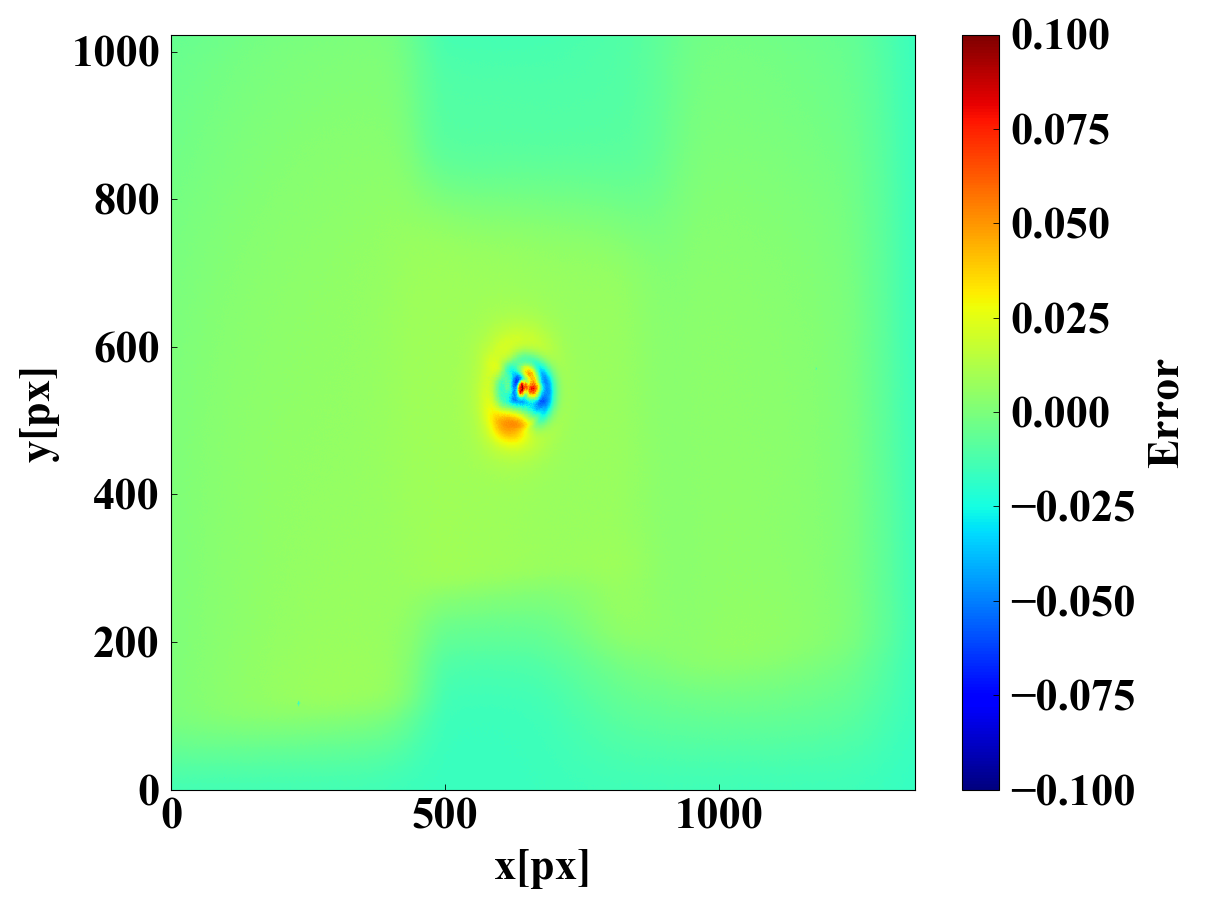

保存ファイル名： 2020-12-09_22-52_error-exp_jet.png
保存ファイルパス： /Users/nagaiyuma/Documents/myprogram/201209/2020-12-09_22-52_error-exp_jet.png


In [17]:
#全面カラーマップ表示
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +'_error-exp_jet.png'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
ax.set_xlabel("x[px]", fontsize=16)
ax.set_ylabel("y[px]", fontsize=16)
ax.tick_params(labelsize=16)
mappable = ax.pcolormesh(xexp_grid.T, yexp_grid.T, error_exp, cmap='jet', vmin=-0.1, vmax=0.1)
cbar = fig.colorbar(mappable, ax=ax)
cbar.set_label("Error", fontsize=16)
cbar.ax.tick_params(labelsize=16)
fig.savefig(save_file)
plt.show()
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

In [18]:
print(f'中心位置: {idx}')
print(f'ガウスparam: {param}')
error = (ave.flatten() - intensity_fit.flatten()).reshape(nx,ny)
std_error = np.std(error)
ave_error = np.average(error)
print(f'残差:{ave_error}±{std_error}')

中心位置: (642, 543)
ガウスparam: [8.53675527e-01 6.43537938e+02 5.39510877e+02 4.67114717e+01
 3.04607053e-02]
残差:6.197477020464248e-12±0.016121334399965458


In [ ]:
%matplotlib qt
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +'_error.svg'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("x[px]", fontsize=16)
ax.set_ylabel("y[px]", fontsize=16)
ax.set_zlabel("Intensity ", fontsize=16)
plt.tick_params(labelsize=16)
ax.set_zlim(-0.1, 0.1)
ax.grid(False)
mappable = ax.scatter(x_grid.T.flatten(), y_grid.T.flatten(), error.flatten(), c=error.flatten(), s=0.1, cmap='jet', vmin=-0.1, vmax=0.1)
cbar = fig.colorbar(mappable, ax=ax)
cbar.set_label("Error", fontsize=16)
cbar.ax.tick_params(labelsize=16)
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
#fig.savefig(save_file, format="svg", bbox_inches="tight")
plt.show()
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

In [ ]:
%matplotlib inline

In [19]:
idx_error = np.unravel_index(np.argmax(error), error.shape)
print(idx_error)
profile_x= error[:,idx_error[1]].flatten()
profile_y= error[idx_error[0],:].flatten()

(100, 104)


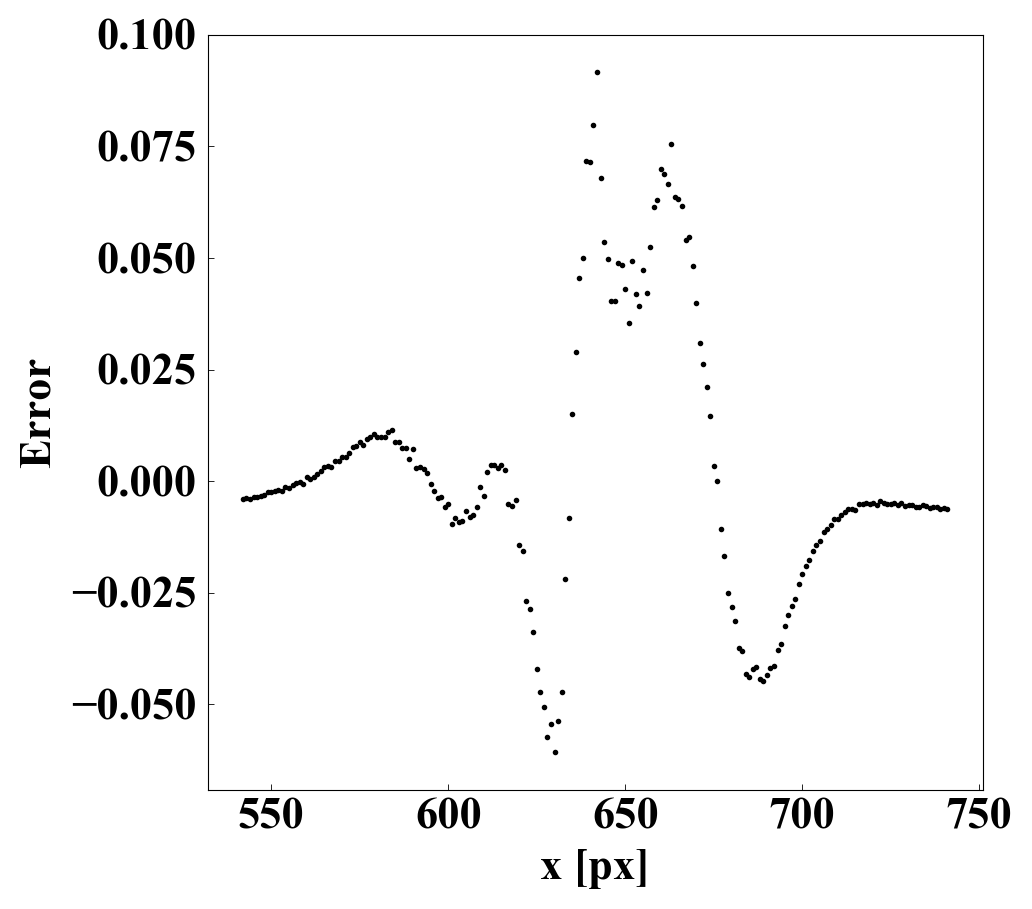

保存ファイル名： 2020-12-09_22-52_error-profile_x.svg
保存ファイルパス： /Users/nagaiyuma/Documents/myprogram/201209/2020-12-09_22-52_error-profile_x.svg


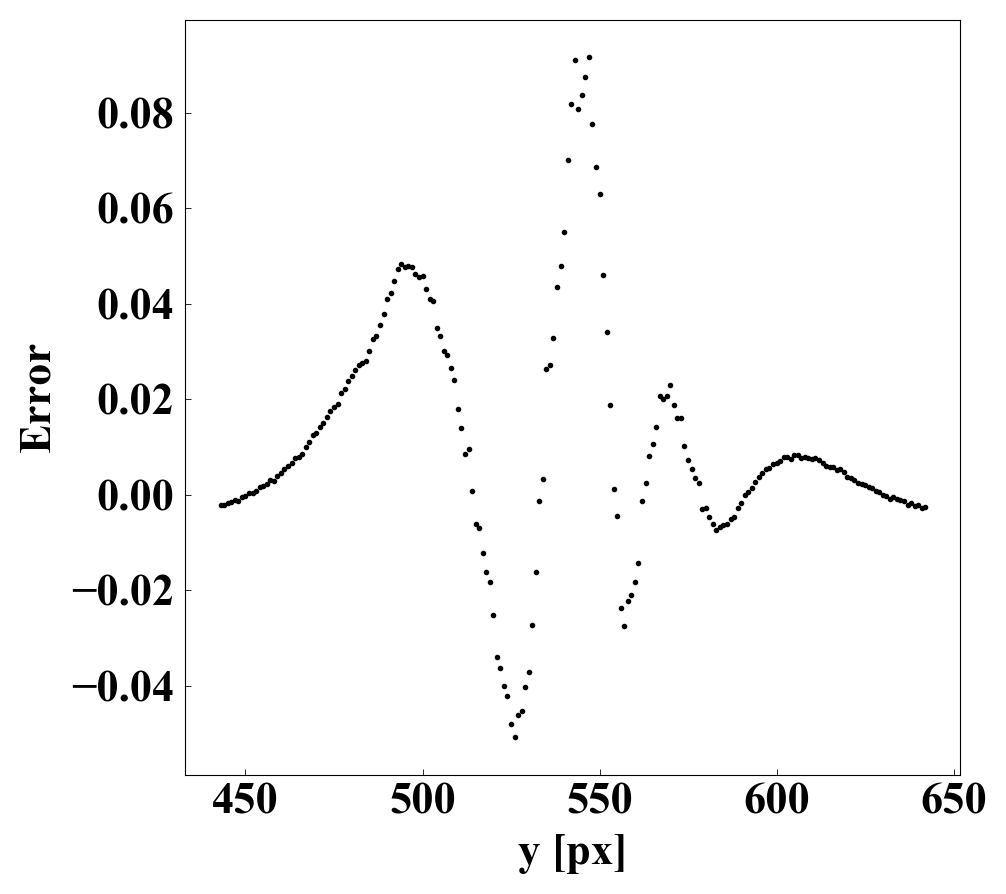

保存ファイル名： 2020-12-09_22-52_error-profile_y.svg
保存ファイルパス： /Users/nagaiyuma/Documents/myprogram/201209/2020-12-09_22-52_error-profile_y.svg


In [20]:
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +'_error-profile_x.svg'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.set_xlabel("x [px]", fontsize=16)
ax.set_ylabel("Error", fontsize=16)
plt.tick_params(labelsize=16)
ax.grid(False)
ax.scatter(x_array, profile_x, color='black', s=1)
#ax.plot(x_array, sincfit_x, color='red')
fig.savefig(save_file, format="svg", bbox_inches="tight")
plt.show()
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +'_error-profile_y.svg'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.set_xlabel("y [px]", fontsize=16)
ax.set_ylabel("Error", fontsize=16)
plt.tick_params(labelsize=16)
ax.grid(False)
ax.scatter(y_array, profile_y, color='black', s=1)
#ax.plot(x_array, sincfit_x, color='red')
fig.savefig(save_file, format="svg", bbox_inches="tight")
plt.show()
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

In [16]:
#2D楕円ガウシアンビームの関数の定義
pi = np.pi
def gaussian_beam_xy(X,i0,b0,x0,y0,wx,wy,h0):
    x,y = X
    return  (i0*np.exp((-2/(1-b0**2))*(((x-x0)/wx)**2+((y-y0)/wy)**2-2*b0*((x-x0)/wx)*((y-y0)/wy)))+ h0).flatten()

#初期パラメータ
i0 = 1.0
b0 = 0.5
x0 = idx[0]
y0 = idx[1]
wx = 50.0
wy = 50.0
h0 = 0.0
ave = ave.flatten()
param_ini = np.array([i0, b0, x0, y0, wx, wy, h0])
param, cov  = curve_fit(gaussian_beam_xy, (x_grid.T, y_grid.T), ave, p0=param_ini, maxfev=2000)
intensity_fit_xy = gaussian_beam_xy((x_grid.T, y_grid.T), *param)
#結果の表示
print(f'ガウスparam: {param}')
error = (ave.flatten() - intensity_fit_xy.flatten()).reshape(nx,ny)
std_error = np.std(error)
ave_error = np.average(error)
print(f'残差:{ave_error}±{std_error}')

#パラメータ保存
dt_now = datetime.datetime.now()
print('現在時刻：', dt_now)
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +f'_fit-param.pkl'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
with open(save_file, mode='wb') as f:
    pickle.dump(param, f)
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)
experiments_file = save_file

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 2000.

現在時刻： 2020-12-15 19:22:26.198061


NameError: name 'x_grid' is not defined

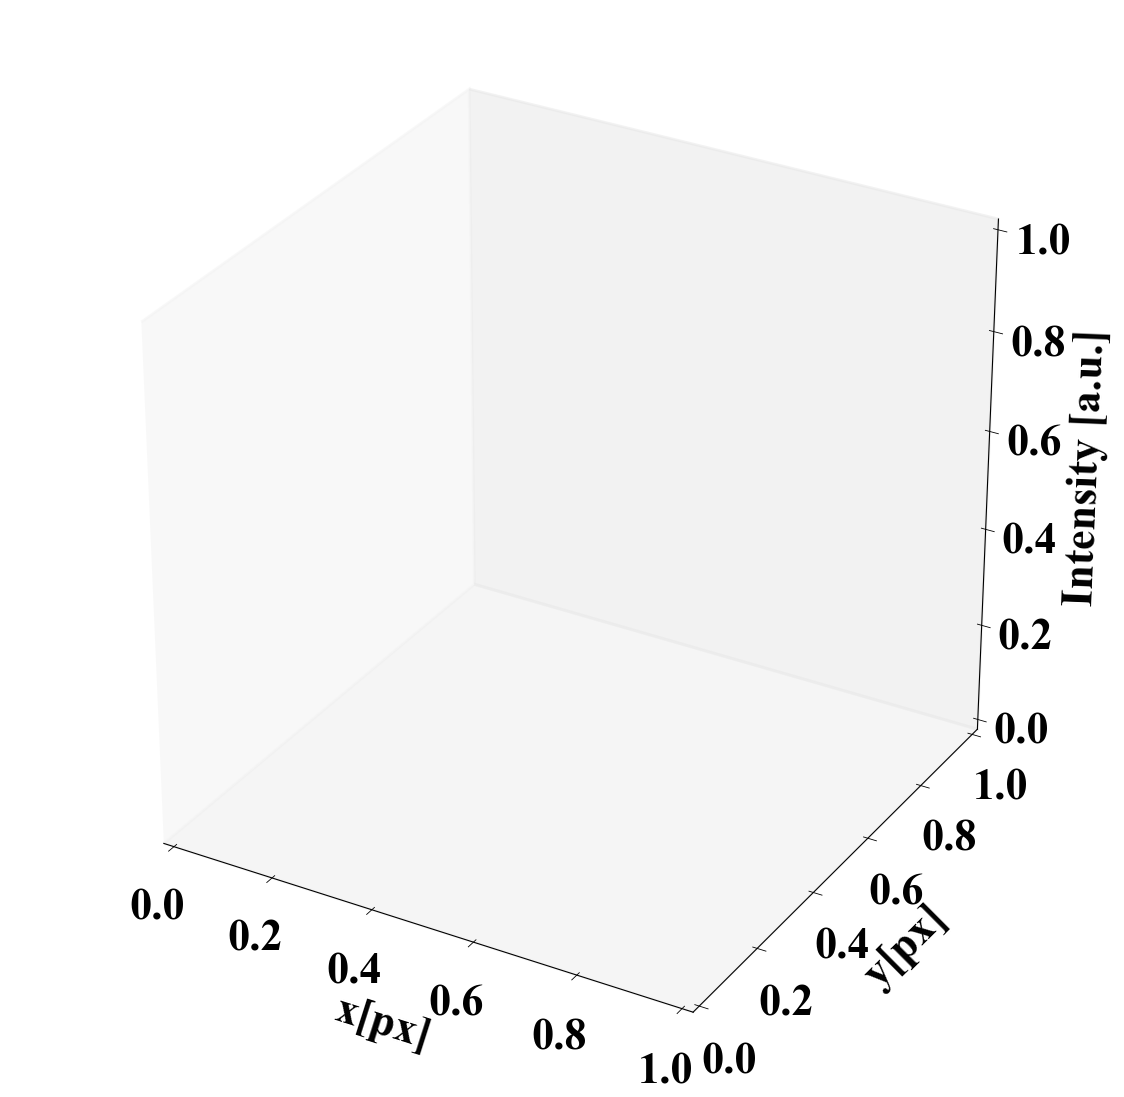

In [11]:
#結果の表示
dt_now = datetime.datetime.now()
print('現在時刻：', dt_now)

save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +'_fig-g.png'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("x[px]", fontsize=16)
ax.set_ylabel("y[px]", fontsize=16)
ax.set_zlabel("Intensity [a.u.]", fontsize=16)
plt.tick_params(labelsize=16)
ax.grid(False)
ax.scatter(x_grid.T, y_grid.T, intensity_fit_xy, color='black', s=0.1)
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
#fig.savefig(save_file, format="png", bbox_inches="tight")
plt.show()
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)
#カラーマップ表示
intensity_fit_xy = intensity_fit_xy.reshape(nx, ny)
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +'_fit_g-cmap.png'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
ax.set_xlabel("x[px]", fontsize=16)
ax.set_ylabel("y[px]", fontsize=16)
ax.tick_params(labelsize=16)
mappable = ax.pcolormesh(x_grid.T, y_grid.T, intensity_fit_xy, cmap='jet', vmin=0.0, vmax=1.0)
cbar = fig.colorbar(mappable, ax=ax)
cbar.set_label("Intensity", fontsize=16,rotation=270,labelpad = 15)
cbar.ax.tick_params(labelsize=16)
#fig.savefig(save_file, format="png", bbox_inches="tight")
plt.show()
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

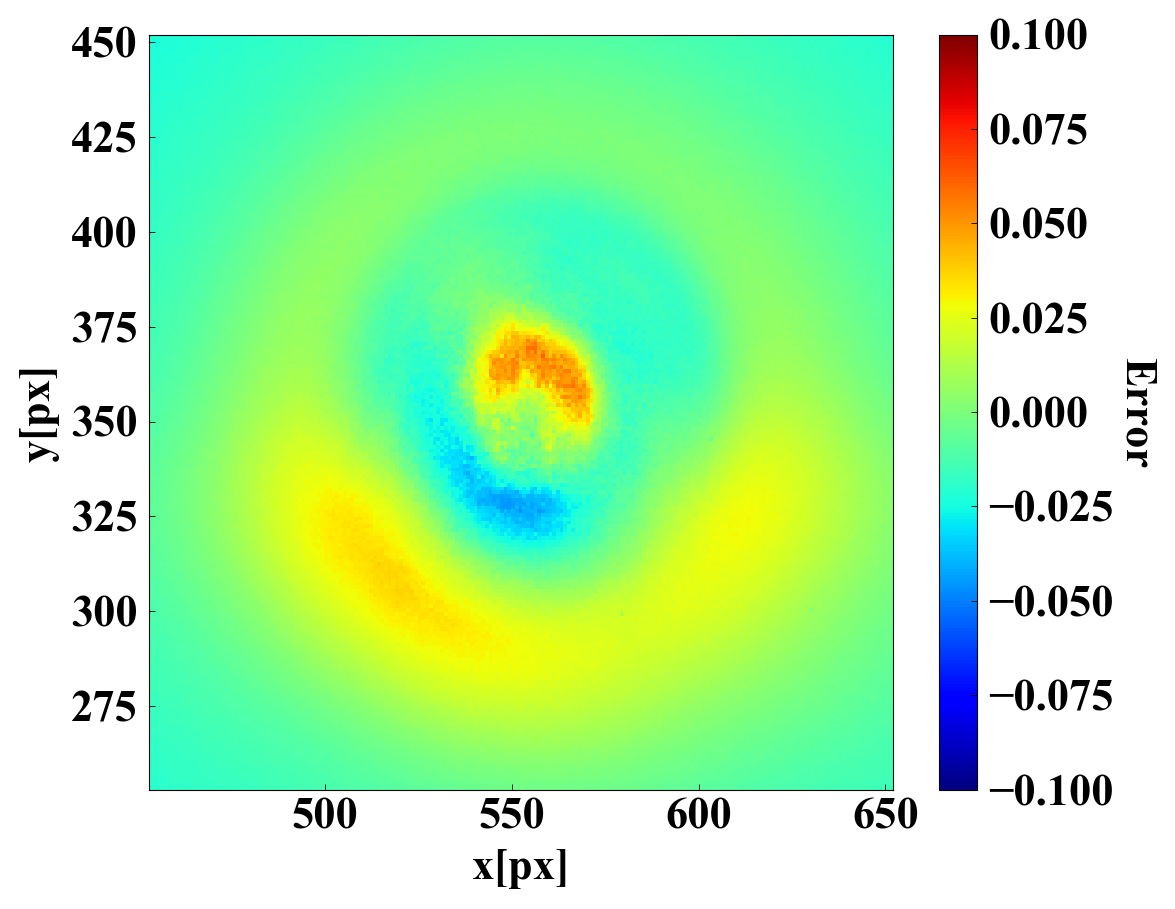

保存ファイル名： 2020-12-12_16-29_error-cmap.png
保存ファイルパス： /Users/nagaiyuma/Documents/myprogram/201212/2020-12-12_16-29_error-cmap.png


In [24]:
#残差のカラーマップ表示
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +'_error-cmap.png'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
ax.set_xlabel("x[px]", fontsize=16)
ax.set_ylabel("y[px]", fontsize=16)
ax.tick_params(labelsize=16)
mappable = ax.pcolormesh(x_grid.T, y_grid.T, error, cmap='jet', vmin=-0.1, vmax=0.1)
cbar = fig.colorbar(mappable, ax=ax)
cbar.set_label("Error", fontsize=16,rotation=270,labelpad=15)
cbar.ax.tick_params(labelsize=16)
fig.savefig(save_file, format="png", bbox_inches="tight")
plt.show()
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

In [ ]:
# 傾いた平面上の2Dガウシアンビームの関数の定義
def gaussian_beam_2d(X,a,b,c,d,e,f,g):
    x,y = X
    return  (a * np.exp(-2*((x-b)**2+(y-c)**2)/d**2) + e*x + f*y +g).flatten()

#初期パラメータ
i0 = 1.0
x0 = idx[0]
y0 = idx[1]
w0 = 50.0
a0 = 0.0
b0 = 0.0
h0 = 0.0
ave = ave.flatten()
param_ini = np.array([i0, x0, y0, w0, a0, b0, h0])  # フィッティングの初期値 (ここではデータから推定は行わない)
param, cov  = curve_fit(gaussian_beam_2d, (x_grid.T, y_grid.T), ave, p0=param_ini, maxfev=2000)
intensity_fit = gaussian_beam_2d((x_grid.T, y_grid.T), *param)
#結果の表示
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("x[px]", fontsize=16)
ax.set_ylabel("y[px]", fontsize=16)
ax.set_zlabel("Intensity [a.u.]", fontsize=16)
plt.tick_params(labelsize=16)
ax.grid(False)
ax.scatter(x_grid.T, y_grid.T, intensity_fit, color='black', s=0.1)
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
#fig.savefig(save_file, format="svg", bbox_inches="tight")
plt.show()
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

In [ ]:
error = (ave.flatten() - intensity_fit.flatten()).reshape(nx,ny)

save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +'_error.svg'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("x[px]", fontsize=16)
ax.set_ylabel("y[px]", fontsize=16)
ax.set_zlabel("Intensity [a.u.]", fontsize=16)
plt.tick_params(labelsize=16)
ax.grid(False)
mappable = ax.scatter(x_grid.T.flatten(), y_grid.T.flatten(), error.flatten(), c = error.flatten(), cmap='jet', s=0.1, vmin=-0.1, vmax=0.1)
fig.colorbar(mappable, ax=ax)
#ax.set_zlim(-0.5, 1.0)
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
#fig.savefig(save_file, format="svg", bbox_inches="tight")
plt.show()
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)
error = error.reshape(nx, ny)
x_grid = x_grid.reshape(nx, ny)
y_grid = y_grid.reshape(nx, ny)
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +'_hsv.svg'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
ax.set_xlabel("x[px]", fontsize=16)
ax.set_ylabel("y[px]", fontsize=16)
mappable = ax.pcolormesh(x_grid.T, y_grid.T, error.T, cmap='jet', vmin=-0.1, vmax=0.1)
fig.colorbar(mappable, ax=ax)
#fig.savefig(save_file, format="svg", bbox_inches="tight")
plt.show()
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

In [ ]:
ave_noise = np.average(noise)
std_noise = np.std(noise)
print(f'残差: {ave_noise}±{std_noise}')
print(param)
hist = noise.flatten()
# ヒストグラムのグラフを作成
plt.figure()
plt.hist(hist, bins=500, color='black')
plt.xlabel('Noise')
plt.ylabel('Frequency')
plt.xlim(-0.5, 0.5)
plt.savefig(save_file, format="svg", bbox_inches="tight")
plt.show()
plt.close()

In [ ]:
hist = error.flatten()
# ヒストグラムのグラフを作成
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +'_hist.png'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
plt.figure()
plt.hist(hist, bins=500, color='black')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.xlim(-0.5, 0.5)
plt.ylim(0.0, 700.0)
plt.savefig(save_file)
plt.show()
plt.close()
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

In [ ]:
#2D楕円ガウシアンビームの関数の定義
pi = np.pi
def gaussian_beam_2d(X,i0,b0,x0,y0,wx,wy,h0):
    x,y = X
    return  (i0/(2*np.pi*wx*wy*np.sqrt(1-b0**2))
             *np.exp((-2/(1-b0**2))*(((x-x0)/wx)**2+((y-y0)/wy)**2-2*b0*((x-x0)/wx)*((y-y0)/wy)))+ h0).flatten()

#初期パラメータ
i0 = 1.0
b0 = 0.5
x0 = idx[0]
y0 = idx[1]
wx = 50.0
wy = 50.0
h0 = 0.0
ave = ave.flatten()
param_ini = np.array([i0, b0, x0, y0, wx, wy, h0])
param, cov  = curve_fit(gaussian_beam_2d, (x_grid.T, y_grid.T), ave, p0=param_ini, maxfev=2000)
intensity_fit = gaussian_beam_2d((x_grid.T, y_grid.T), *param)
print(param)

In [ ]:
#ある実験データの表示
dt_now = datetime.datetime.now()
print('現在時刻：', dt_now)

#表示データ抽出
size = 100
idx = np.unravel_index(np.argmax(ave_exp), ave_exp.shape)
exp_1 = experiments[49][idx[0]-size:idx[0]+size, idx[1]-size:idx[1]+size]
x_array = np.arange(idx[0]-size, idx[0]+size, 1.0)                         # x配列
y_array = np.arange(idx[1]-size, idx[1]+size, 1.0)                         # y配列
x_grid, y_grid = np.meshgrid(x_array, y_array)
#3次元グラフ
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +'_exp-1.svg'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("x[px]", fontsize=16)
ax.set_ylabel("y[px]", fontsize=16)
ax.set_zlabel("Intensity", fontsize=16)
plt.tick_params(labelsize=16)
ax.grid(False)
ax.scatter(x_grid.T, y_grid.T, exp_1, color='black', s=0.1)
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
#fig.savefig(save_file, format="svg", bbox_inches="tight")
plt.show()
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)
#カラーマップ表示
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +'_exp-1-jet.svg'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
ax.set_xlabel("x[px]", fontsize=16)
ax.set_ylabel("y[px]", fontsize=16)
ax.tick_params(labelsize=16)
mappable = ax.pcolormesh(x_grid.T, y_grid.T, exp_1, cmap='jet', vmin=0.0, vmax=1.0)
cbar = fig.colorbar(mappable, ax=ax)
cbar.set_label("Error", fontsize=16)
cbar.ax.tick_params(labelsize=16)
fig.savefig(save_file, format="svg", bbox_inches="tight")
plt.show()
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

In [ ]:
#sinc関数
def sinc(x,a,b,c,d):
    return a*(np.sinc(b*(x-c))**2) +d
#sincフィッティング
param_ini = np.array([0.1,0.05,550,-0.1])
param, cov  = curve_fit(sinc, x_array, profile_x, p0=param_ini, maxfev=2000)
sincfit_x = sinc(x_array,*param)
sincfit_x = sinc(x_array,*param_ini)
print(param)
param, cov  = curve_fit(sinc, y_array, profile_y, p0=param_ini, maxfev=2000)
sincfit_y = sinc(y_array,*param)
print(param)